In [1]:
# Header Files
import io
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import sys
import random
import warnings

import h5py
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

#from tqdm import tqdm 

from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
#from keras.models import model_from_json

In [2]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)
config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)
config.log_device_placement = False  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)  # set this TensorFlow session as the default session for Keras

In [3]:
BUILDINGS_INPUT = "./buildings/data_images.h5"
BUILDINGS_MASKS = "./buildings/data_masks.h5"
ROADS_INPUT = "./roads/road_256.h5"
ROADS_MASKS = "./roads/mask_256.h5"
LANDCOVER_INPUT = "./greenblue/trainX.h5"
LANDCOVER_MASKS = "./greenblue/trainY.h5"

DATA_REPO = [[BUILDINGS_INPUT, BUILDINGS_MASKS], [ROADS_INPUT, ROADS_MASKS], [LANDCOVER_INPUT, LANDCOVER_MASKS]]

In [4]:
def showData(opt, NUM_SAMPLES=5, OFFSET=0):
    hf1 = h5py.File(DATA_REPO[opt][0], 'r')
    hf2 = h5py.File(DATA_REPO[opt][1],'r')

    input_image=[]
    input_mask=[]

    input_image = list(hf1.keys())
    input_image = sorted(input_image)
    
    input_mask = list(hf2.keys())
    input_mask  = sorted(input_mask)
    
    print(len(input_image))
    print(len(input_mask))
    
    if opt == 2:
        OFFSET = 1000

    _, pics = plt.subplots(1,5, figsize=(15, 15))
    for i, path in enumerate(input_image[OFFSET:OFFSET+NUM_SAMPLES]):
        data=hf1.get(path)
        data=np.array(data)
        img = Image.open(io.BytesIO(data))
        pics[i].imshow(img)
    
    
    _, pics = plt.subplots(1,5, figsize=(15, 15))
    for i, path in enumerate(input_mask[OFFSET:OFFSET+NUM_SAMPLES]):
        data=hf2.get(path)
        data=np.array(data)
        img = Image.open(io.BytesIO(data))
        pics[i].imshow(img)
        if opt == 2:
            print(np.unique(np.array(img)), end=' ')

    hf1.close()
    hf2.close()

6226
6226


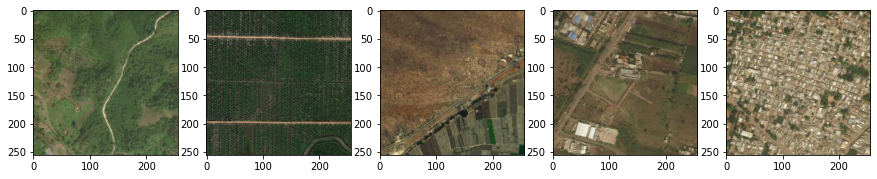

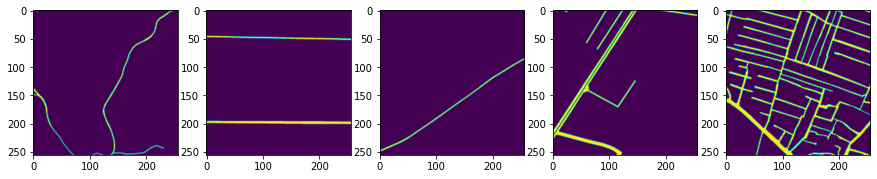

In [6]:
opt = 1 # 0 Buildings, 1 Roads, 2 LandCover
showData(opt)

280741
280741


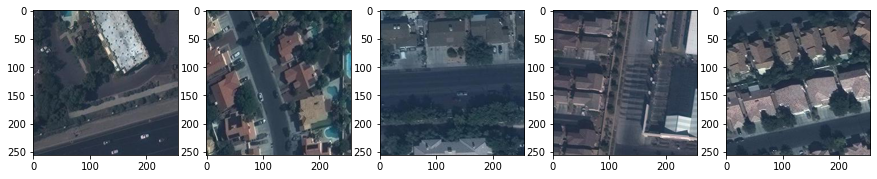

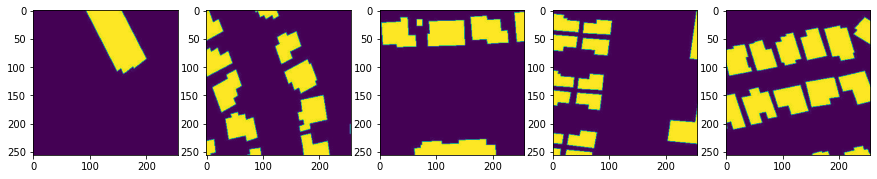

In [7]:
opt = 0 # 0 Buildings, 1 Roads, 2 LandCover
showData(opt)

43292
43292
[2] [0 2] [3] [0 3] [0 2] 

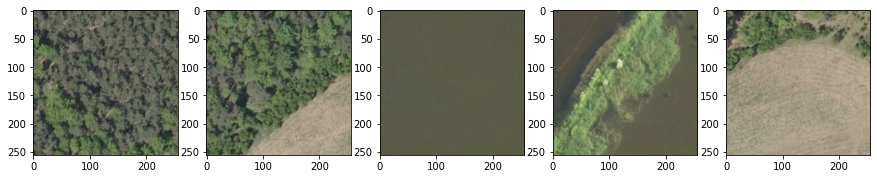

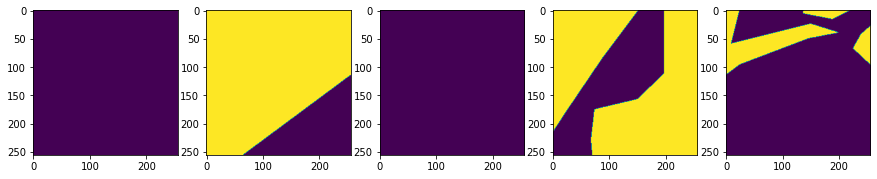

In [8]:
opt = 2 # 0 Buildings, 1 Roads, 2 LandCover
showData(opt)

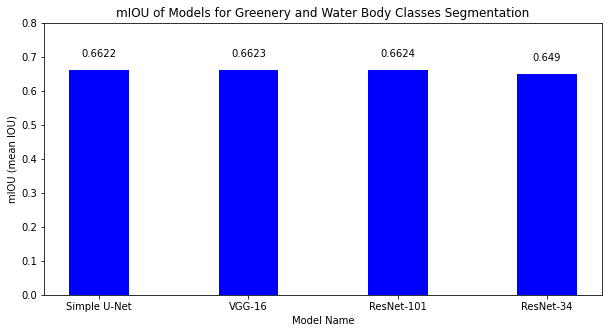

In [31]:
import numpy as np
import matplotlib.pyplot as plt
  
# creating the dataset
data = {'Simple U-Net':0.6622, 'VGG-16':0.6623, 'ResNet-101':0.6624, 'ResNet-34': 0.649}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
bar_plot = plt.bar(courses, values, color ='blue', width = 0.4)

def autolabel(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, values[idx], ha='center', va='bottom', rotation=0)

autolabel(bar_plot)

plt.ylim(0,0.8)
plt.xlabel("Model Name")
plt.ylabel("mIOU (mean IOU)")
plt.title("mIOU of Models for Greenery and Water Body Classes Segmentation")
plt.show()